Joshua Mundt

Project 1 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters

In [24]:
# function for average 
def moving_average(x,y,step_size=.5,bin_size=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        items_in_bin = y[(x>(bin_center-bin_size*0.5) ) & (x<(bin_center+bin_size*0.5))]
        bin_avg[index] = np.mean(items_in_bin)

    return bin_centers,bin_avg

In [25]:
# funtion for ntp seconds to datetime
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [26]:
# function for counting the bumber of dives
def getnumberofDives(a):
    bottom=max(a)
    atbottom=False
    divecount=0
    
    for i in range(0,len(a)):
        
        if(a[i]>0.95*bottom and not atbottom):
            atbottom=True
        
        if(a[i]<0.95*bottom and atbottom):
            atbottom=False
            divecount+=1
    return divecount

=====================================================================================================================

#1.1.1 Cabled Axial Seamount Axial Base Shallow Profiler Mooring - Shallow Profiler 

2019-07-06  -  2019-07-07 

ASS=Axial summer shallow     z=depth [m]; z=h=P/(rho*g)

In [27]:
ASS=pd.read_csv("Axial_summer_shallow.csv")
A1=ASS.seawater_pressure
AA1=ASS.time
B1=ASS.seawater_temperature
C1=ASS.practical_salinity
z1=(A1*10000)/(1000*9.81)
ssp1=1449.2+(4.6*B1)-(0.055*B1**2)+(0.00029*B1**3)+(1.34-0.01*B1)*(C1-35)+(0.016*z1)
s1=max(ssp1)
print("the max speed of sound is ",s1, "m/s")
x1=ssp1
y1=z1

the max speed of sound is  1507.3063881255669 m/s


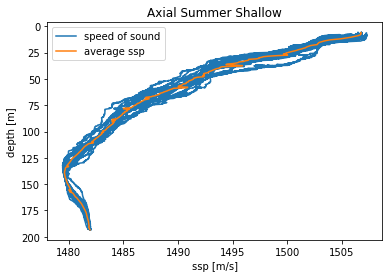

In [89]:
#plot the moving average

bins, average = moving_average(y1,x1)
plt.plot(x1,y1, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Axial Summer Shallow')
plt.show()

The number of dives for Axial Base Summer Shallow is =  9


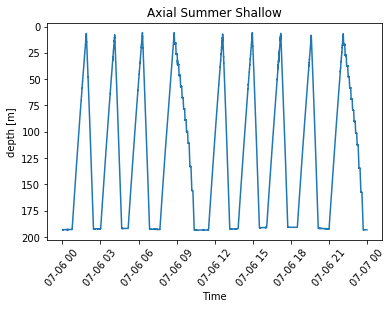

In [29]:

time1=[]
for i in range(len(AA1)):
    time1.append(ntp_seconds_to_datetime(AA1[i]))

plt.plot(time1,z1)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Axial Summer Shallow')
plt.xticks(rotation=50)

N1=getnumberofDives(z1)
print("The number of dives for Axial Base Summer Shallow is = ",N1) 



(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

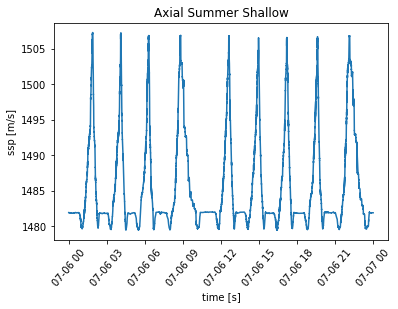

In [104]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Axial Summer Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#1.1.2 Cabled Axial Seamount Axial Base Shallow Profiler Mooring - 200m Platform

2019-01-06 -  2019-01-07 

AWS= Axial winter shallow

In [30]:
AWS=pd.read_csv("Axial_winter_shallow.csv")
A2=AWS.seawater_pressure
AA2=AWS.time
B2=AWS.seawater_temperature
C2=AWS.practical_salinity
# the depth
z2=(A2*10000)/(1000*9.81)

In [31]:
ssp2=1449.2+(4.6*B2)-(0.055*B2**2)+(0.00029*B2**3)+(1.34-0.01*B2)*(C2-35)+(0.016*z2)
x2=ssp2
y2=z2
s2=max(ssp2)
print("the max speed of sound is ",s2, "m/s")


the max speed of sound is  1493.4774261282842 m/s


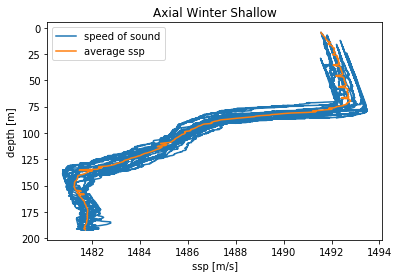

In [90]:
#plot the moving average

bins, average = moving_average(y2,x2)
plt.plot(x2,y2, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Axial Winter Shallow')
plt.show()

The number of dives for Axial Base Winter Shallow is =  9


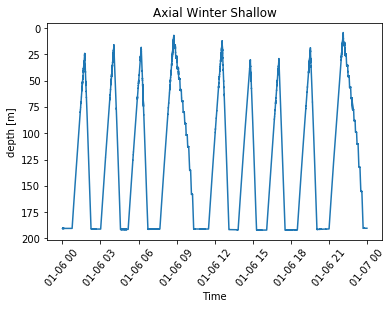

In [33]:
time2=[]
for i in range(len(AA2)):
 time2.append(ntp_seconds_to_datetime(AA2[i]))

plt.plot(time2,z2)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Axial Winter Shallow')
plt.xticks(rotation=50)

N2=getnumberofDives(z2)
print("The number of dives for Axial Base Winter Shallow is = ",N2)


(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

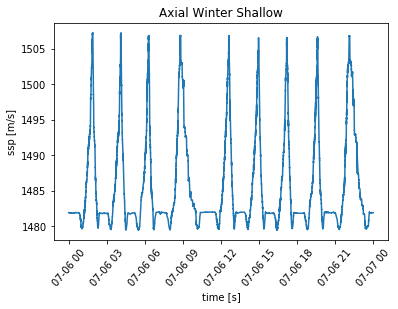

In [130]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Axial Winter Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#1.2.1 Cabled Axial Seamount Axial Base Deep Profiler Mooring - Wire-Following Profiler 

2019-07-06   -  2019-07-07 

ASD=Axial summer deep

In [34]:
ASD=pd.read_csv("Axial_summer_deep.csv")
A3=ASD.pressure
AA3=ASD.time
B3=ASD.temp
C3=ASD.practical_salinity
z3=(A3*10000)/(1000*9.81)

In [35]:
ssp3=1449.2+(4.6*B3)-(0.055*B3**2)+(0.00029*B3**3)+(1.34-0.01*B3)*(C3-35)+(0.016*z3)
x3=ssp3
y3=z3
s3=max(ssp3)
print("the max speed of sound is ",s3, "m/s")

the max speed of sound is  1499.868054806177 m/s


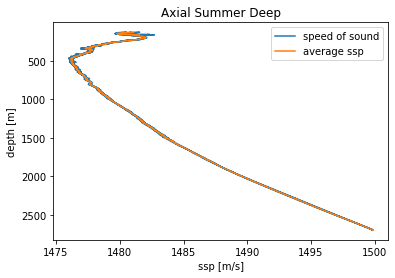

In [91]:
#plot the moving average

bins, average = moving_average(y3,x3)
plt.plot(x3,y3, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Axial Summer Deep')
plt.show()


The number of dives for Axial Base Summer Deep is =  2


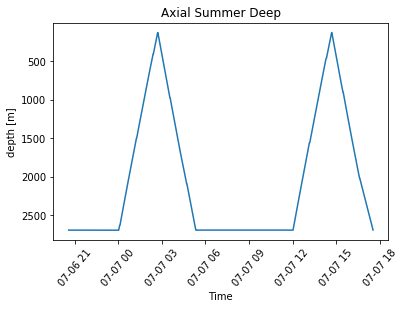

In [37]:
time3=[]
for i in range(len(AA3)):
 time3.append(ntp_seconds_to_datetime(AA3[i]))

plt.plot(time3,z3)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Axial Summer Deep')
plt.xticks(rotation=50)

N3=getnumberofDives(z3)
print("The number of dives for Axial Base Summer Deep is = ",N3)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

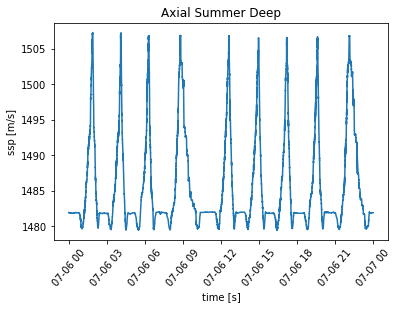

In [142]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Axial Summer Deep')
plt.xticks(rotation=50)

=====================================================================================================================

#1.2.2 Cabled Axial Seamount Axial Base Deep Profiler Mooring - Wire-Following Profiler

2019-01-06 - 2019-01-07

AWD= Axial winter deep

In [38]:
AWD=pd.read_csv("Axial_winter_deep.csv")
A4=AWD.pressure
AA4=AWD.time
B4=AWD.temp
C4=AWD.practical_salinity
z4=(A4*10000)/(1000*9.81)
ssp4=1449.2+(4.6*B4)-(0.055*B4**2)+(0.00029*B4**3)+(1.34-0.01*B4)*(C4-35)+(0.016*z4)
x4=ssp4
y4=z4
s4=max(ssp4)
print("the max speed of sound is ",s4, "m/s")

the max speed of sound is  1500.0062497840217 m/s


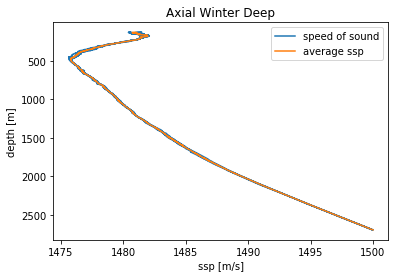

In [143]:
#plot the moving average

bins, average = moving_average(y4,x4)
plt.plot(x4,y4, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Axial Winter Deep')
plt.show()

The number of dives for Axial Base winter Deep is =  2


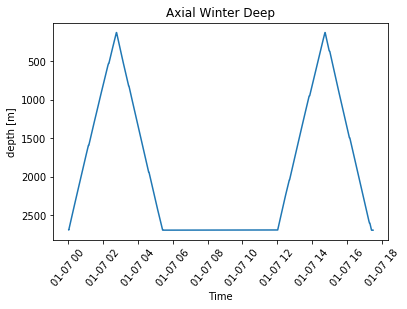

In [144]:
time4=[]
for i in range(len(AA4)):
 time4.append(ntp_seconds_to_datetime(AA4[i]))

plt.plot(time4,z4)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Axial Winter Deep')
plt.xticks(rotation=50)

N4=getnumberofDives(z4)
print("The number of dives for Axial Base winter Deep is = ",N4)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

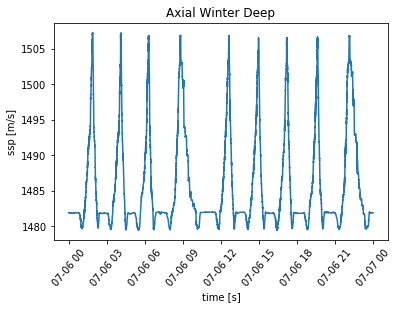

In [141]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Axial Winter Deep')
plt.xticks(rotation=50)

=====================================================================================================================

#2.1.1 Cabled Continental Margin Oregon Slope Base Shallow Profiler Mooring - 200m Platform

2019-07-16 - 2019-07-17

SSS=Slope summer shallow

In [41]:
SSS=pd.read_csv("Slope_summer_shallow.csv")
A5=SSS.seawater_pressure
AA5=SSS.time
B5=SSS.seawater_temperature
C5=SSS.practical_salinity
z5=(A5*10000)/(1000*9.81)
ssp5=1449.2+(4.6*B5)-(0.055*B5**2)+(0.00029*B5**3)+(1.34-0.01*B5)*(C5-35)+(0.016*z5)
x5=ssp5
y5=z5
s5=max(ssp5)
print("the max speed of sound is ",s5, "m/s")


the max speed of sound is  1512.1982193470035 m/s


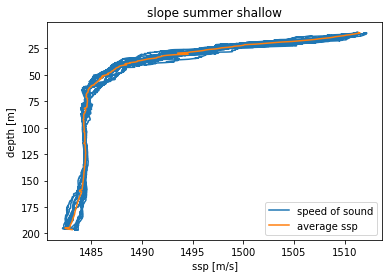

In [93]:
#plot the moving average

bins, average = moving_average(y5,x5)
plt.plot(x5,y5, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('slope summer shallow')
plt.show()

The number of dives for Slope Summer Shallow is =  6


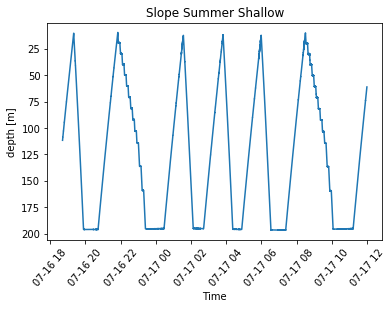

In [43]:
time5=[]
for i in range(len(AA5)):
    time5.append(ntp_seconds_to_datetime(AA5[i]))

plt.plot(time5,z5)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Slope Summer Shallow')
plt.xticks(rotation=50)

N5=getnumberofDives(z5)
print("The number of dives for Slope Summer Shallow is = ",N5)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

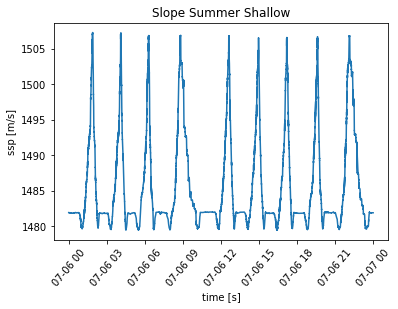

In [140]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Slope Summer Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#2.1.2 Cabled Continental Margin Oregon Slope Base Shallow Profiler Mooring - 200m Platform

2019-01-06 - 2019-01-07

SWS=Slope winter shallow

In [44]:
SWS=pd.read_csv("Slope_winter_shallow.csv")
A6=SWS.seawater_pressure
AA6=SWS.time
B6=SWS.seawater_temperature
C6=SWS.practical_salinity
z6=(A6*10000)/(1000*9.81)
ssp6=1449.2+(4.6*B6)-(0.055*B6**2)+(0.00029*B6**3)+(1.34-0.01*B6)*(C6-35)+(0.016*z6)
x6=ssp6
y6=z6
s6=max(ssp6)
print("the max speed of sound is ",s6, "m/s")

the max speed of sound is  1492.3342718780652 m/s


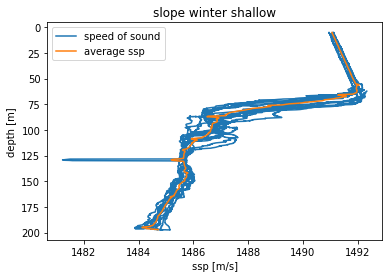

In [94]:
#plot the moving average

bins, average = moving_average(y6,x6)
plt.plot(x6,y6, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('slope winter shallow')
plt.show()

The number of dives for Slope Winter Shallow is =  6


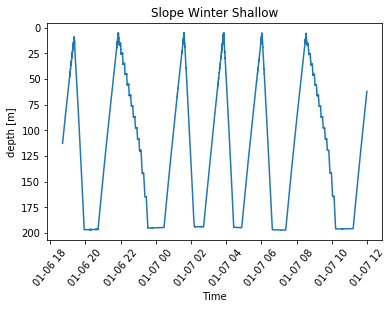

In [46]:
time6=[]
for i in range(len(AA6)):
 time6.append(ntp_seconds_to_datetime(AA6[i]))

plt.plot(time6,z6)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Slope Winter Shallow')
plt.xticks(rotation=50)

N6=getnumberofDives(z6)
print("The number of dives for Slope Winter Shallow is = ",N6)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

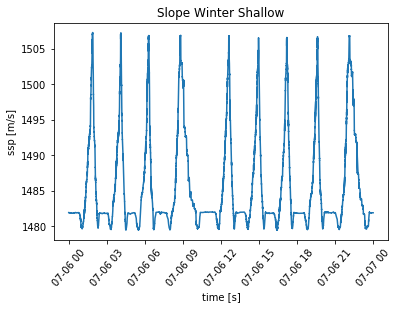

In [139]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Slope Winter Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#2.2.1 Cabled Continental Margin Oregon Slope Base Deep Profiler Mooring - Wire-Following Profiler 

2019-07-07   -  2019-07-08

SSD=slope summer deep

In [47]:
SSD=pd.read_csv("Slope_summer_deep.csv")
A7=SSD.pressure
AA7=SSD.time
B7=SSD.temp
C7=SSD.practical_salinity
z7=(A7*10000)/(1000*9.81)
ssp7=1449.2+(4.6*B7)-(0.055*B7**2)+(0.00029*B7**3)+(1.34-0.01*B7)*(C7-35)+(0.016*z7)
x7=ssp7
y7=z7
s7=max(ssp7)
print("the max speed of sound is ",s7, "m/s")

the max speed of sound is  1504.3826589322339 m/s


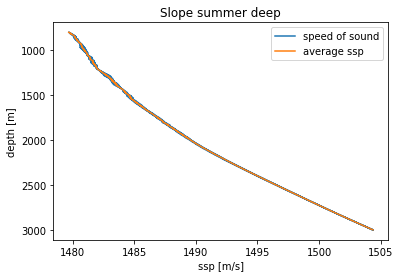

In [95]:
#plot the moving average

bins, average = moving_average(y7,x7)
plt.plot(x7,y7, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Slope summer deep')
plt.show()


The number of dives for Slope Summer Deep is =  2


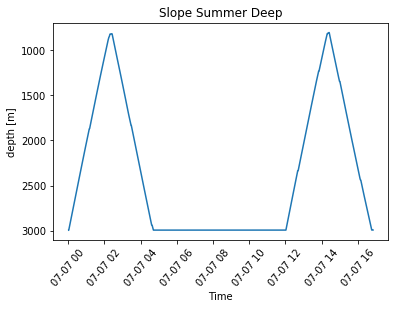

In [49]:
time7=[]
for i in range(len(AA7)):
    time7.append(ntp_seconds_to_datetime(AA7[i]))

plt.plot(time7,z7)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Slope Summer Deep')
plt.xticks(rotation=50)

N7=getnumberofDives(z7)
print("The number of dives for Slope Summer Deep is = ",N7)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

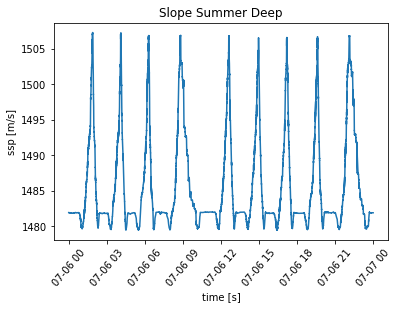

In [138]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Slope Summer Deep')
plt.xticks(rotation=50)

=====================================================================================================================

#2.2.2 Cabled Continental Margin Oregon Slope Base Deep Profiler Mooring - Wire-Following Profiler

2019-01-14 - 2019-01-15

SWD= slope winter deep

In [86]:
SWD=pd.read_csv("Slope_Winter_Deepwater.csv")
A8=SWD.pressure
AA8=SWD.time
B8=SWD.temp
C8=SWD.practical_salinity
z8=A8
#z8=(A8*10000)/(1000*9.81)
ssp8=1449.2+(4.6*B8)-(0.055*B8**2)+(0.00029*B8**3)+(1.34-0.01*B8)*(C8-35)+(0.016*z8)
x8=ssp8
y8=z8
s8=max(ssp8)
print("the max speed of sound is ",s8, "m/s")

the max speed of sound is  1503.1515182592807 m/s


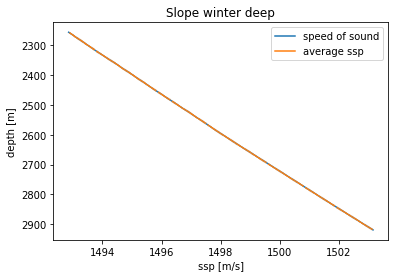

In [96]:
#plot the moving average

bins, average = moving_average(y8,x8)
plt.plot(x8,y8, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Slope winter deep')
plt.show()



The number of dives for Slope Winter Deep is =  0


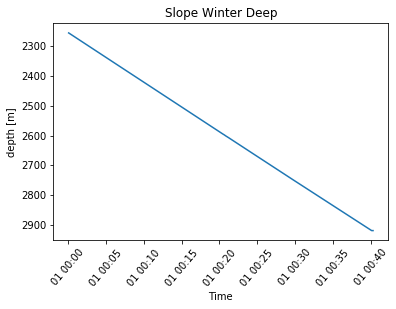

In [88]:
time8=[]
for i in range(len(AA8)):
    time8.append(ntp_seconds_to_datetime(AA8[i]))

plt.plot(time8,z8)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Slope Winter Deep')
plt.xticks(rotation=50)

N8=getnumberofDives(z8)
print("The number of dives for Slope Winter Deep is = ",N8)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

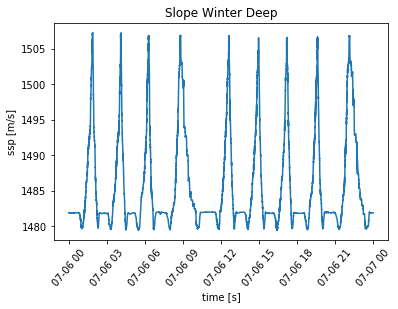

In [137]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Slope Winter Deep')
plt.xticks(rotation=50)

=====================================================================================================================

#3.1.1 Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring - 200m Platform

2019-07-16 - 2019-07-17

OSS= offshore summer shallow

In [53]:
OSS=pd.read_csv("Offshore_summer_shallow.csv")
A9=OSS.seawater_pressure
AA9=OSS.time
B9=OSS.seawater_temperature
C9=OSS.practical_salinity
z9=(A9*10000)/(1000*9.81)
ssp9=1449.2+(4.6*B9)-(0.055*B9**2)+(0.00029*B9**3)+(1.34-0.01*B9)*(C9-35)+(0.016*z9)
x9=ssp9
y9=z9
s9=max(ssp9)
print("the max speed of sound is ",s9, "m/s")

the max speed of sound is  1512.3208171966664 m/s


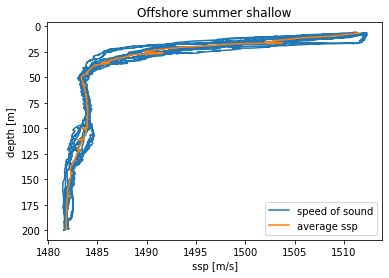

In [97]:
#plot the moving average

bins, average = moving_average(y9,x9)
plt.plot(x9,y9, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Offshore summer shallow')
plt.show()


The number of dives for Offshore Summer Shallow is =  6


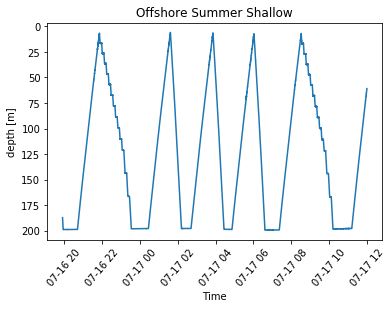

In [55]:
time9=[]
for i in range(len(AA9)):
 time9.append(ntp_seconds_to_datetime(AA9[i]))

plt.plot(time9,z9)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Offshore Summer Shallow')
plt.xticks(rotation=50)

N9=getnumberofDives(z9)
print("The number of dives for Offshore Summer Shallow is = ",N9)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

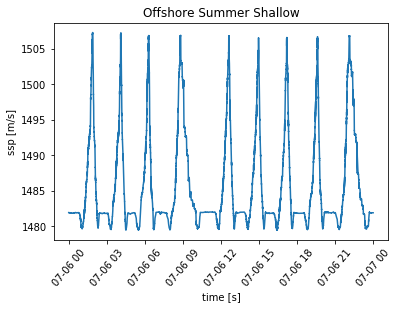

In [136]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Offshore Summer Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#3.1.2 Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring - 200m Platform

2019-01-15 - 2019-01-16

OWS= offshore winter shallow

In [56]:
OWS=pd.read_csv("Offshore_winter_shallow.csv")
A10=OWS.seawater_pressure
AA10=OWS.time
B10=OWS.seawater_temperature
C10=OWS.practical_salinity
z10=(A10*10000)/(1000*9.81)
ssp10=1449.2+(4.6*B10)-(0.055*B10**2)+(0.00029*B10**3)+(1.34-0.01*B10)*(C10-35)+(0.016*z10)
x10=ssp10
y10=z10
s10=max(ssp10)
print("the max speed of sound is ",s10, "m/s")

the max speed of sound is  1493.258195997046 m/s


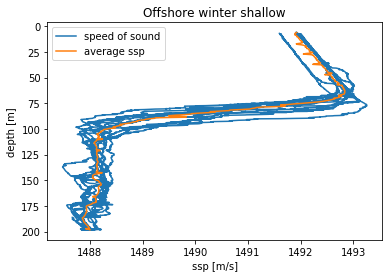

In [98]:
#plot the moving average

bins, average = moving_average(y10,x10)
plt.plot(x10,y10, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Offshore winter shallow')
plt.show()


The number of dives for Offshore Winter Shallow is =  6


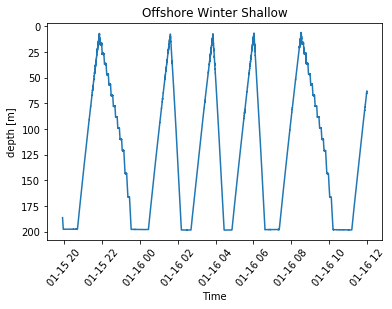

In [58]:
time10=[]
for i in range(len(AA10)):
 time10.append(ntp_seconds_to_datetime(AA10[i]))

plt.plot(time10,z10)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Offshore Winter Shallow')
plt.xticks(rotation=50)

N10=getnumberofDives(z10)
print("The number of dives for Offshore Winter Shallow is = ",N10)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

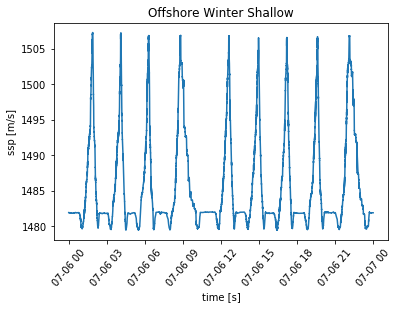

In [135]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Offshore Winter Shallow')
plt.xticks(rotation=50)

=====================================================================================================================

#3.2.1 Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring - Wire-Following Profiler

2019-07-10 - 2019-07-11

OSD= offshore summer deep



In [59]:
OSD=pd.read_csv("Offshore_summer_deep.csv")
A11=OSD.pressure
AA11=OSD.time
B11=OSD.temp
C11=OSD.practical_salinity
z11=(A11*10000)/(1000*9.81)
ssp11=1449.2+(4.6*B11)-(0.055*B11**2)+(0.00029*B11**3)+(1.34-0.01*B11)*(C11-35)+(0.016*z11)
x11=ssp11
y11=z11
s11=max(ssp11)
print("the max speed of sound is ",s11, "m/s")

the max speed of sound is  1484.4679109229542 m/s


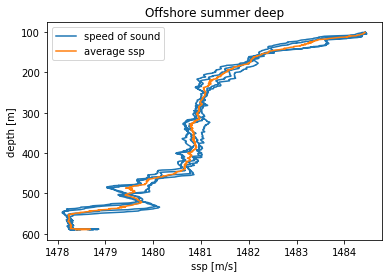

In [99]:
#plot the moving average

bins, average = moving_average(y11,x11)
plt.plot(x11,y11, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Offshore summer deep')
plt.show()


The number of dives for Offshore Summer Deep is =  2


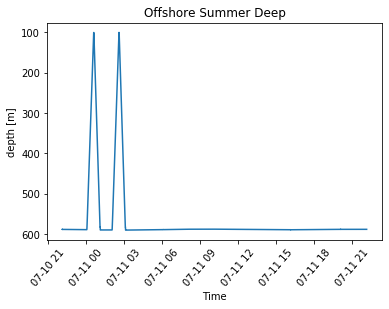

In [61]:
time11=[]
for i in range(len(AA11)):
 time11.append(ntp_seconds_to_datetime(AA11[i]))

plt.plot(time11,z11)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Offshore Summer Deep')
plt.xticks(rotation=50)

N11=getnumberofDives(z11)
print("The number of dives for Offshore Summer Deep is = ",N11)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

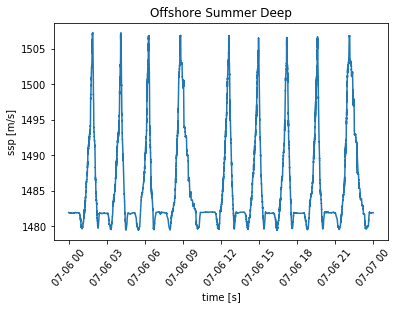

In [134]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Offshore Summer Deep')
plt.xticks(rotation=50)

=====================================================================================================================

#3.2.2 Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring - Wire-Following Profiler

2019-12-16 - 2019-12-17

OWD= offshore winter deep



In [62]:
OWD=pd.read_csv("Offshore_winter_deep.csv")
A12=OWD.pressure
AA12=OWD.time
B12=OWD.temp
C12=OWD.practical_salinity
z12=(A12*10000)/(1000*9.81)
ssp12=1449.2+(4.6*B12)-(0.055*B12**2)+(0.00029*B12**3)+(1.34-0.01*B12)*(C12-35)+(0.016*z12)
x12=ssp12
y12=z12
s12=max(ssp1)
print("the max speed of sound is ",s12, "m/s")

the max speed of sound is  1507.3063881255669 m/s


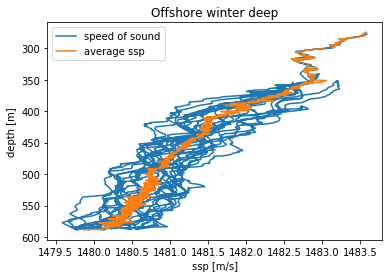

In [100]:
#plot the moving average

bins, average = moving_average(y12,x12)
plt.plot(x12,y12, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Offshore winter deep')
plt.show()


The number of dives for Offshore Winter Deep is =  12


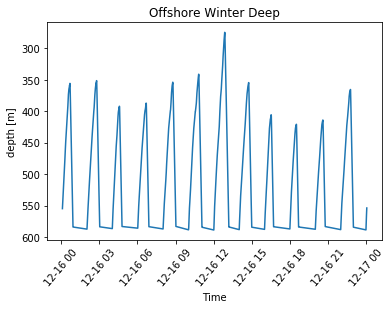

In [64]:
time12=[]
for i in range(len(AA12)):
 time12.append(ntp_seconds_to_datetime(AA12[i]))

plt.plot(time12,z12)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Offshore Winter Deep')
plt.xticks(rotation=50)

N12=getnumberofDives(z12)
print("The number of dives for Offshore Winter Deep is = ",N12)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

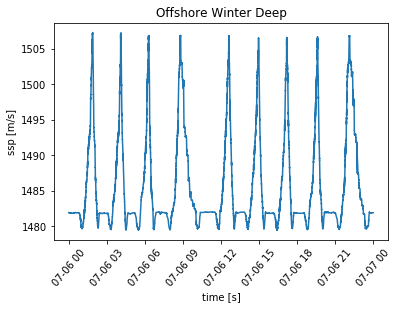

In [133]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Offshore Winter Deep')
plt.xticks(rotation=50)

=====================================================================================================================



3.3.1  Summer Coastal Endurance Washington Shelf Surface Piercing Profiler Mooring - Surface Piercing Profiler - CTD

5/18/2017  -- 5/19/2017

SOSSP= Summer Oregon Shelf Surface Piercing

In [123]:
SOSSP=pd.read_csv("Summer_Oregon_Shelf_Surface_Piercing.csv")
A13=SOSSP.pressure
AA13=SOSSP.time
B13=SOSSP.temperature
C13=SOSSP.salinity
z13=A13
ssp13=1449.2+(4.6*B13)-(0.055*B13**2)+(0.00029*B13**3)+(1.34-0.01*B13)*(C13-35)+(0.016*z13)
x13=ssp13
y13=z13
s13=max(ssp13)
print("the max speed of sound is ",s13, "m/s")

the max speed of sound is  1491.2844186471993 m/s


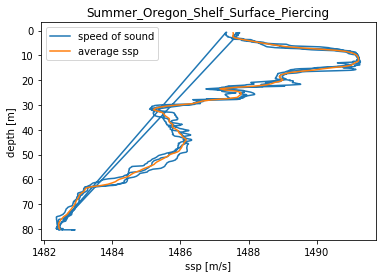

In [124]:
#plot the moving average

bins, average = moving_average(y13,x13)
plt.plot(x13,y13, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Summer_Oregon_Shelf_Surface_Piercing')
plt.show()

The number of dives for Summer_Oregon_Shelf_Surface_Piercing is =  3


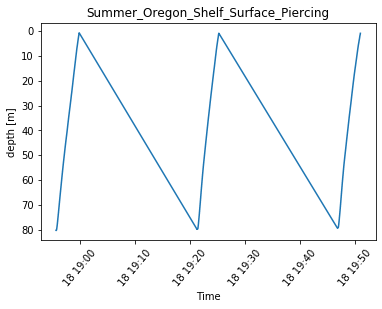

In [125]:
time13=[]
for i in range(len(AA13)):
 time13.append(ntp_seconds_to_datetime(AA13[i]))

plt.plot(time13,z13)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Summer_Oregon_Shelf_Surface_Piercing')
plt.xticks(rotation=50)

N13=getnumberofDives(z13)
print("The number of dives for Summer_Oregon_Shelf_Surface_Piercing is = ",N13)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

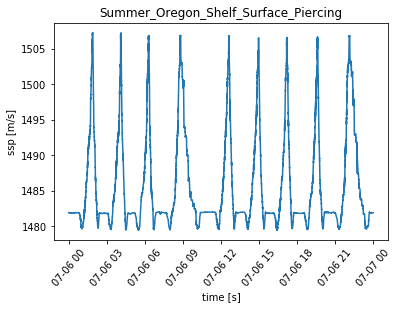

In [132]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Summer_Oregon_Shelf_Surface_Piercing')
plt.xticks(rotation=50)

3.3.2 Winter Coastal Endurance Washington Shelf Surface Piercing Profiler Mooring - Surface Piercing Profiler - CTD

11/12/2018 -- 11/13/2018

WOSSP= Wummer Oregon Shelf Surface Piercing

In [127]:
WOSSP=pd.read_csv("Winter_Oregon_Shelf_Surface_Piercing.csv")
A14=SOSSP.pressure
AA14=SOSSP.time
B14=SOSSP.temperature
C14=SOSSP.salinity
z14=A14
ssp14=1449.2+(4.6*B14)-(0.055*B14**2)+(0.00029*B14**3)+(1.34-0.01*B14)*(C14-35)+(0.016*z14)
x14=ssp14
y14=z14
s14=max(ssp14)
print("the max speed of sound is ",s14, "m/s")

the max speed of sound is  1491.2844186471993 m/s


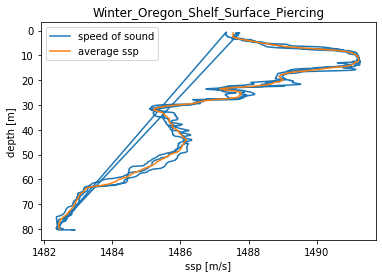

In [128]:
#plot the moving average

bins, average = moving_average(y14,x14)
plt.plot(x14,y14, label='speed of sound')
plt.plot(average,bins,label='average ssp')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('ssp [m/s]')
plt.ylabel('depth [m]')
plt.title('Winter_Oregon_Shelf_Surface_Piercing')
plt.show()

The number of dives for Winter_Oregon_Shelf_Surface_Piercing is =  3


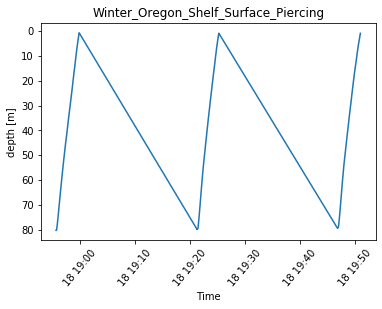

In [129]:
time14=[]
for i in range(len(AA14)):
 time14.append(ntp_seconds_to_datetime(AA14[i]))

plt.plot(time14,z14)
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Time')
plt.title('Winter_Oregon_Shelf_Surface_Piercing')
plt.xticks(rotation=50)

N14=getnumberofDives(z14)
print("The number of dives for Winter_Oregon_Shelf_Surface_Piercing is = ",N14)

(array([737246.   , 737246.125, 737246.25 , 737246.375, 737246.5  ,
        737246.625, 737246.75 , 737246.875, 737247.   ]),
 <a list of 9 Text xticklabel objects>)

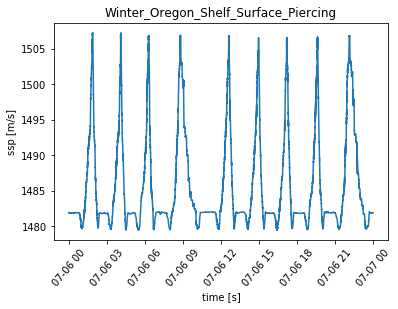

In [131]:
plt.plot(time1,ssp1)
plt.ylabel('ssp [m/s]')
plt.xlabel('time [s]')
plt.title('Winter_Oregon_Shelf_Surface_Piercing')
plt.xticks(rotation=50)